<a href="https://colab.research.google.com/github/kash1shh/Image-Compression/blob/main/ImgCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image compressed in 16.84 seconds using random initialization.
Image compressed in 4.68 seconds using kmeans++ initialization.
Random Initialization:


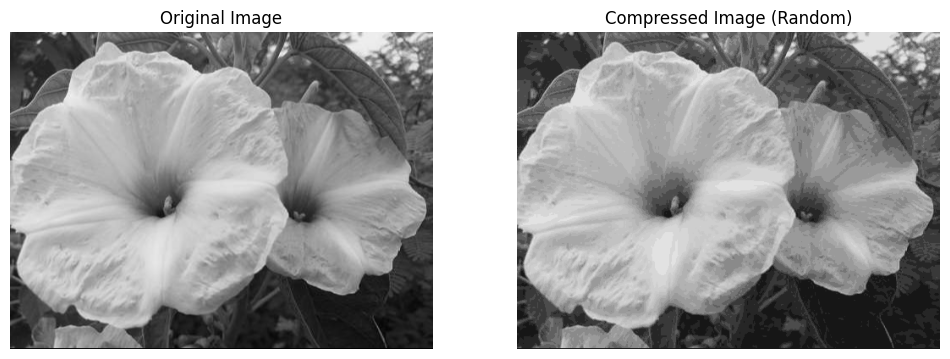

KMeans++ Initialization:


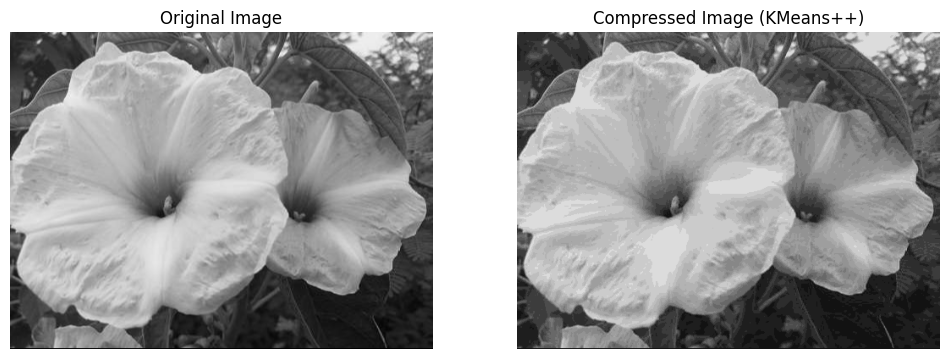

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import timeit

# Optimized KMeans function
def kmeans(X, k, max_iters=100, init_method='random'):
    if init_method == 'random':
        centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]
    elif init_method == 'kmeans++':
        centroids = [X[np.random.choice(range(X.shape[0]))]]
        for _ in range(1, k):
            dist_sq = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)**2, axis=1)
            probs = dist_sq / np.sum(dist_sq)
            cumulative_probs = np.cumsum(probs)
            r = np.random.rand()
            i = np.searchsorted(cumulative_probs, r)
            centroids.append(X[i])
        centroids = np.array(centroids)

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # Ensure centroids are valid
        if np.any(np.isnan(new_centroids)):
            print("NaN found in new centroids, breaking...")
            break
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Load and process image
def load_image(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img_data = np.array(img)
    return img_data, img

# Compress image using KMeans
def compress_image(image_path, k, init_method='random'):
    img_data, img = load_image(image_path)
    X = img_data.reshape(-1, 3)

    start_time = timeit.default_timer()
    labels, centroids = kmeans(X, k, init_method=init_method)
    end_time = timeit.default_timer()

    if centroids is not None and labels is not None:
        compressed_img_data = centroids[labels].reshape(img_data.shape).astype(np.uint8)
        compressed_img = Image.fromarray(compressed_img_data)
        print(f"Image compressed in {end_time - start_time:.2f} seconds using {init_method} initialization.")
    else:
        compressed_img = None
        print(f"Failed to compress image using {init_method} initialization.")

    return compressed_img

# Plot original and compressed images
def plot_images(original_img, compressed_img, title_suffix=''):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Compressed Image {title_suffix}")
    if compressed_img is not None:
        plt.imshow(compressed_img)
    else:
        plt.text(0.5, 0.5, 'Compression failed', horizontalalignment='center', verticalalignment='center')
    plt.axis('off')

    plt.show()

# Main function
if __name__ == "__main__":
    image_path = '/content/imageonline.jpg'  # Change this to your image path
    k = 16  # Number of clusters (colors)

    original_img = Image.open(image_path).convert('RGB')

    compressed_img_random = compress_image(image_path, k, init_method='random')
    compressed_img_kmeanspp = compress_image(image_path, k, init_method='kmeans++')

    print("Random Initialization:")
    plot_images(original_img, compressed_img_random, title_suffix='(Random)')

    print("KMeans++ Initialization:")
    plot_images(original_img, compressed_img_kmeanspp, title_suffix='(KMeans++)')
